# An Experimental Study on Breast Ultrasound Tumor Segementation




In this Notebook we explore the UNet based segmentation of Breast US Tumor Images. The main idea is to study the efficiency of automatic semantic segmentation of the images with the help of UNet.

For the purpose experimentation two publicly available datasets are utilized, 

*   BUSI dataset. (https://www.sciencedirect.com/science/article/pii/S2352340919312181)
*   UDIAT dataset. (https://ieeexplore.ieee.org/abstract/document/8003418)



The dataset images have been preprocessed and converted to 224x224 dimensionality and saved as .npy files. These files will be used directly in this Notebook.

In [1]:
# Connect to Google Drive to access dataset
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Check dataset filenames
import os
import cv2

bus_filenames = os.listdir('/content/gdrive/My Drive/BreastUSDatasetNPYs')
print(bus_filenames)

['busiTestImages.npy', 'busiTestLabels.npy', 'busiTestMasks.npy', 'busiTrainImages.npy', 'udTrainImages.npy', 'busiTrainMasks.npy', 'udTestLabels.npy', 'udTestMasks.npy', 'udTestImages.npy', 'busiTrainLabels.npy', 'udTrainLabels.npy', 'udTrainMasks.npy']


In [3]:
# Read the Numpy files containing the dataset.
import numpy as np

busiTrainImages = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTrainImages.npy')
busiTrainMasks = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTrainMasks.npy')
busiTrainLabels = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTrainLabels.npy')
busiTestImages = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTestImages.npy')
busiTestMasks = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTestMasks.npy')
busiTestLabels = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTestLabels.npy')

udTrainImages = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTrainImages.npy')
udTrainMasks = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTrainMasks.npy')
udTrainLabels = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTrainLabels.npy')
udTestImages = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTestImages.npy')
udTestMasks = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTestMasks.npy')
udTestLabels = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTestLabels.npy')

print(busiTrainImages.shape)
print(busiTrainMasks.shape)
print(busiTrainLabels.shape)
print(busiTestImages.shape)
print(busiTestMasks.shape)
print(busiTestLabels.shape)

print(udTrainImages.shape)
print(udTrainMasks.shape)
print(udTrainLabels.shape)
print(udTestImages.shape)
print(udTestMasks.shape)
print(udTestLabels.shape)

(532, 224, 224)
(532, 224, 224)
(532,)
(133, 224, 224)
(133, 224, 224)
(133,)
(130, 224, 224)
(130, 224, 224)
(130,)
(33, 224, 224)
(33, 224, 224)
(33,)


In [4]:
# Inspect the pixel value range 

print(busiTrainImages[0])
print(busiTrainMasks[0])
print(busiTrainLabels[0])

# The images and also the masks are having pixel values in the range 0-255
# We need to rescale the data to bring all pixel values to the range 0 to 1

busiTrainImages = busiTrainImages/255.
busiTrainMasks = busiTrainMasks/255.

busiTestImages = busiTestImages/255.
busiTestMasks = busiTestMasks/255.

udTrainImages = udTrainImages/255.
udTrainMasks = udTrainMasks/255.

udTestImages = udTestImages/255.
udTestMasks = udTestMasks/255.

[[ 80 174  37 ... 208 207 199]
 [ 83 207  21 ... 195 199 202]
 [ 85 161  42 ... 180 182 186]
 ...
 [ 20  19  16 ...  36  46  54]
 [ 29  27  23 ...  57  53  46]
 [ 20  20  23 ...  37  32  30]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0


In [5]:
# After rescaling the pixel values are modified
print(busiTrainImages[0])

[[0.31372549 0.68235294 0.14509804 ... 0.81568627 0.81176471 0.78039216]
 [0.3254902  0.81176471 0.08235294 ... 0.76470588 0.78039216 0.79215686]
 [0.33333333 0.63137255 0.16470588 ... 0.70588235 0.71372549 0.72941176]
 ...
 [0.07843137 0.0745098  0.0627451  ... 0.14117647 0.18039216 0.21176471]
 [0.11372549 0.10588235 0.09019608 ... 0.22352941 0.20784314 0.18039216]
 [0.07843137 0.07843137 0.09019608 ... 0.14509804 0.1254902  0.11764706]]


In [6]:
print(busiTrainImages.shape)
print(busiTrainMasks.shape)
print(udTrainImages.shape)
print(udTrainMasks.shape)
print(busiTestImages.shape)
print(busiTestMasks.shape)
print(udTestImages.shape)
print(udTestMasks.shape)

(532, 224, 224)
(532, 224, 224)
(130, 224, 224)
(130, 224, 224)
(133, 224, 224)
(133, 224, 224)
(33, 224, 224)
(33, 224, 224)


In [7]:
# Reshape all the samples into (#samples,224,224,1)

busiTrainImages = busiTrainImages.reshape((-1, 224, 224, 1))
busiTrainMasks = busiTrainMasks.reshape((-1, 224, 224, 1))
busiTestImages = busiTestImages.reshape((-1, 224, 224, 1))
busiTestMasks = busiTestMasks.reshape((-1, 224, 224, 1))

udTrainImages = udTrainImages.reshape((-1, 224, 224, 1))
udTrainMasks = udTrainMasks.reshape((-1, 224, 224, 1))
udTestImages = udTestImages.reshape((-1, 224, 224, 1))
udTestMasks = udTestMasks.reshape((-1, 224, 224, 1))

print(busiTrainImages.shape)
print(busiTrainMasks.shape)
print(udTrainImages.shape)
print(udTrainMasks.shape)
print(busiTestImages.shape)
print(busiTestMasks.shape)
print(udTestImages.shape)
print(udTestMasks.shape)

(532, 224, 224, 1)
(532, 224, 224, 1)
(130, 224, 224, 1)
(130, 224, 224, 1)
(133, 224, 224, 1)
(133, 224, 224, 1)
(33, 224, 224, 1)
(33, 224, 224, 1)


In [14]:
# Since for the purpose of segmentation the number of samples is quite less, we combine the two datasets.
combinedTrainImages = np.concatenate((busiTrainImages,udTrainImages),axis=0)
combinedTrainMasks = np.concatenate((busiTrainMasks,udTrainMasks),axis=0)
combinedTestImages = np.concatenate((busiTestImages,udTestImages),axis=0)
combinedTestMasks = np.concatenate((busiTestMasks,udTestMasks),axis=0)

print(combinedTrainImages.shape)
print(combinedTrainMasks.shape)
print(combinedTestImages.shape)
print(combinedTestMasks.shape)

(662, 224, 224, 1)
(662, 224, 224, 1)
(166, 224, 224, 1)
(166, 224, 224, 1)


In [15]:
# Split the training data into training and validation sets.

from sklearn.model_selection import train_test_split


# Train test split

xTrain,xVal,yTrain,yVal = train_test_split(combinedTrainImages,combinedTrainMasks, test_size=0.20, shuffle = True)


print(xTrain.shape)
print(yTrain.shape)
print(xVal.shape)
print(yVal.shape)
print(combinedTestImages.shape)
print(combinedTestMasks.shape)

(529, 224, 224, 1)
(529, 224, 224, 1)
(133, 224, 224, 1)
(133, 224, 224, 1)
(166, 224, 224, 1)
(166, 224, 224, 1)


### Once our data is ready, next we prepare our model and loss functions.


In [16]:
import warnings
from tensorflow.keras import backend as K
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D as GAP

from keras.losses import binary_crossentropy
import keras.backend as K


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred = K.cast(y_pred, 'float32')
    y_pred_f = K.cast(K.greater(K.flatten(y_pred), 0.5), 'float32')
    intersection = y_true_f * y_pred_f
    score = 2. * K.sum(intersection) / (K.sum(y_true_f) + K.sum(y_pred_f))
    return score

def dice_loss(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f * y_true_f) + K.sum(y_pred_f * y_pred_f) + smooth)
    return 1. - score

def bce_dice_loss(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')
    return binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)


In [17]:
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D
from tensorflow.keras.layers import *
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D as GAP
from tensorflow.keras import layers

IMG_HEIGHT=224
IMG_WIDTH = 224
IMG_CHANNELS = 1
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

c1 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)
c2 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)
c3 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)
c4 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
c5 = Conv2D(1024, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(1024, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

# Break here for multitask learning

u6 = Conv2DTranspose(512,(2, 2), strides=(2, 2),padding='same') (c5)
u6 = layers.concatenate([u6, c4])
c6 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)
u7 = Conv2DTranspose(256,(2, 2), strides=(2, 2),padding='same') (c6)
u7 = layers.concatenate([u7, c3])
c7 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)
u8 = Conv2DTranspose(128,(2, 2), strides=(2, 2),padding='same') (c7)
u8 = layers.concatenate([u8, c2])
c8 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)
u9 = Conv2DTranspose(64,(2, 2), strides=(2, 2),padding='same') (c8)
u9 = layers.concatenate([u9, c1], axis=3)
c9 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)
seg_branch = Conv2D(1, (1, 1), activation='sigmoid', name='seg_output') (c9)

model = tf.keras.Model(inputs = inputs, outputs = seg_branch)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 224, 224, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [18]:
# Compile model

model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[dice_coef])

Epoch 1/500
34/34 [==============================] - 71s 1s/step - loss: 1.4232 - dice_coef: 0.1051 - val_loss: 1.2062 - val_dice_coef: 0.0039
Epoch 2/500
34/34 [==============================] - 43s 1s/step - loss: 1.0374 - dice_coef: 0.1463 - val_loss: 1.1272 - val_dice_coef: 0.0457
Epoch 3/500
34/34 [==============================] - 43s 1s/step - loss: 0.9529 - dice_coef: 0.2104 - val_loss: 0.8753 - val_dice_coef: 0.2548
Epoch 4/500
34/34 [==============================] - 43s 1s/step - loss: 0.9018 - dice_coef: 0.2921 - val_loss: 0.8561 - val_dice_coef: 0.3697
Epoch 5/500
34/34 [==============================] - 43s 1s/step - loss: 0.8359 - dice_coef: 0.3175 - val_loss: 0.7823 - val_dice_coef: 0.3752
Epoch 6/500
34/34 [==============================] - 43s 1s/step - loss: 0.8036 - dice_coef: 0.3408 - val_loss: 0.8125 - val_dice_coef: 0.3165
Epoch 7/500
34/34 [==============================] - 43s 1s/step - loss: 0.8097 - dice_coef: 0.3523 - val_loss: 0.7869 - val_dice_coef: 0.4109

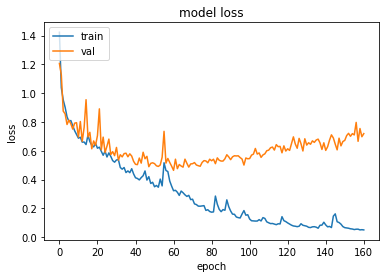

In [19]:
# Model training with earlystopping

import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=100, verbose=1, mode='min',restore_best_weights=True)

history = model.fit(xTrain, yTrain,
              epochs=500,
              verbose=1,
              validation_data = (xVal, yVal), batch_size=16,
              callbacks = [es]
             )

# Plot the training and validation losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
model.save('/content/gdrive/My Drive/BreastUSDatasetNPYs/Combined_UNet_Model.h5')

In [21]:
# Make predictions on test set
testPreds = model.predict(combinedTestImages)
print(testPreds.shape)

(166, 224, 224, 1)


In [23]:
# Evaluate the test set predictions based on Dice Score
dScoreList = list()

for i in range(len(testPreds)):
  yTrue = combinedTestMasks[i].reshape((224,224))
  yPred = testPreds[i].reshape((224,224))
  yTrue = tf.convert_to_tensor(yTrue, np.float32)
  yTrue = K.cast(yTrue, 'float32')
  yPred = tf.convert_to_tensor(yPred, np.float32)
  yPred = K.cast(yPred, 'float32')
  dScoreList.append(float(1-dice_loss(yTrue, yPred)))

print(dScoreList)
print('The average Dice Score of the test set segmentation is: ',np.mean(dScoreList))

[0.09170430898666382, 0.845727801322937, 0.7470941543579102, 0.970902144908905, 0.01332634687423706, 0.1370307207107544, 0.7913942933082581, 0.09965306520462036, 0.2106572389602661, 0.8720808029174805, 0.7620186805725098, 0.5638324022293091, 0.362601637840271, 0.6197812557220459, 0.2423211932182312, 0.9351905584335327, 0.9329071044921875, 0.9312455058097839, 0.9096270203590393, 0.9351567625999451, 0.2175004482269287, 0.4959160089492798, 0.9230114221572876, 0.6633973121643066, 0.6507247686386108, 0.42320185899734497, 0.5620959401130676, 0.9043064713478088, 0.915550708770752, 0.9261789321899414, 0.1721305251121521, 0.20695841312408447, 0.9724377989768982, 0.8711205720901489, 0.9321907758712769, 0.6474726796150208, 0.9378888010978699, 0.8896368741989136, 0.9554059505462646, 0.9413787126541138, 0.13902318477630615, 0.8946936130523682, 0.8590953350067139, 0.9315415024757385, 0.8995092511177063, 0.5887740254402161, 0.9010825157165527, 0.8483723998069763, 0.6634516716003418, 0.623518586158752

We can observe that the automatic segmentation model is able to achieve a decent average Dice Score of ~70% on the combined test set.

The following are the best test predictions in the order: Original BUS, G.T. Mask, Prediction


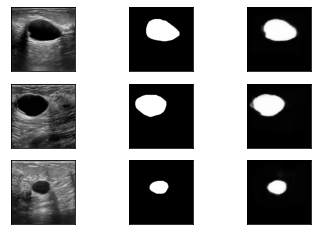

In [24]:
# Display a few sample predictions: the best 3 and the worst 3

indList = [i for i in range(len(combinedTestImages))]

sortedInds = [x for _,x in sorted(zip(dScoreList,indList))]

# Get the best and the worst scoring predictions

bestInds = [sortedInds[-1],sortedInds[-2],sortedInds[-3]]
worstInds = [sortedInds[0],sortedInds[1],sortedInds[2]]

# Display the 3 best predictions

print('The following are the best test predictions in the order: Original BUS, G.T. Mask, Prediction')
fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(combinedTestImages[bestInds[0]].reshape((224,224)), cmap='gray')

axs[0, 1].imshow(combinedTestMasks[bestInds[0]].reshape((224,224)), cmap='gray')

axs[0, 2].imshow(testPreds[bestInds[0]].reshape((224,224)), cmap='gray')

axs[1, 0].imshow(combinedTestImages[bestInds[1]].reshape((224,224)), cmap='gray')

axs[1, 1].imshow(combinedTestMasks[bestInds[1]].reshape((224,224)), cmap='gray')

axs[1, 2].imshow(testPreds[bestInds[1]].reshape((224,224)), cmap='gray')

axs[2, 0].imshow(combinedTestImages[bestInds[2]].reshape((224,224)), cmap='gray')

axs[2, 1].imshow(combinedTestMasks[bestInds[2]].reshape((224,224)), cmap='gray')

axs[2, 2].imshow(testPreds[bestInds[2]].reshape((224,224)), cmap='gray')

# remove the x and y ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

The following are the worst test predictions in the order: Original BUS, G.T. Mask, Prediction


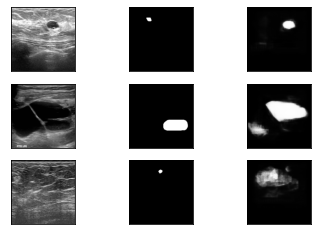

In [25]:
# Display the 3 worst predictions

print('The following are the worst test predictions in the order: Original BUS, G.T. Mask, Prediction')
fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(combinedTestImages[worstInds[0]].reshape((224,224)), cmap='gray')

axs[0, 1].imshow(combinedTestMasks[worstInds[0]].reshape((224,224)), cmap='gray')

axs[0, 2].imshow(testPreds[worstInds[0]].reshape((224,224)), cmap='gray')

axs[1, 0].imshow(combinedTestImages[worstInds[1]].reshape((224,224)), cmap='gray')

axs[1, 1].imshow(combinedTestMasks[worstInds[1]].reshape((224,224)), cmap='gray')

axs[1, 2].imshow(testPreds[worstInds[1]].reshape((224,224)), cmap='gray')

axs[2, 0].imshow(combinedTestImages[worstInds[2]].reshape((224,224)), cmap='gray')

axs[2, 1].imshow(combinedTestMasks[worstInds[2]].reshape((224,224)), cmap='gray')

axs[2, 2].imshow(testPreds[worstInds[2]].reshape((224,224)), cmap='gray')

# remove the x and y ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()